In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [333]:

nlines=5
rainbow=cmap=plt.get_cmap('rainbow')
line_colors = cmap(np.linspace(0,1,nlines))
plasma=plt.get_cmap('plasma')
line_colors2=plasma(np.linspace(0,1,nlines))

## Parameters

__DEATH__

$d = \frac{1}{\text{life expectancy in days}} $

Human : life expectancy $\approx$ 45 years

Mosquito : 20 days 
female mosquito life expectancy 42-56 days 

__BIRTH__

$\nu = \text{births per person per day}$

Human : in Mali 43.219 births per 1000 people per year

$43.219/(1000*365) \approx 1.2x10^{-4}$

Mosquito : keep constant population of mosquitos 

i.e. $\nu = d * N_M $


$N_M$ is number of mosquitos



 43.219 births per 1000 people per year
10.667 deaths per 1000 people per year 

731,000 deaths due to malaria and 216,000,000 cases so probability of death 0.003
protection from death for AS 91% 

In [310]:
def SEIS_death(INP,t):  

    Y=np.zeros((9))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0]*(V[0]+V[3]+V[6]) - V[0] * r * (beta[0][1]*V[8]) - d[0] * V[0] + gamma[0] *V[6]
    #susceptible hosts w mutation
    Y[1] = nu[0]*(V[1]+V[4]+V[7]) - V[1] * r * (beta[0][1]*V[8]) - d[0] * V[1] +gamma[2] *V[7]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][1]*V[7]) ) - d[1] * V[2]
    
    #exposed hosts
    
    Y[3]= V[0] * r * (beta[0][1]*V[8]) -sigma[0]*V[3]- d[0]*V[3]
    
    #exposed hosts w mutation
    
    Y[4] = V[1] * r * (beta[0][1]*V[8]) -sigma[0]*V[4]- d[0]*V[4]
    
    #exposed mosquitos
    
    Y[5]=V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][1]*V[7]) -sigma[1]*V[5]- d[1]*V[5]
    
    #infected hosts
    Y[6] = sigma[0]*V[3] - gamma[0] * V[6] - d[0] * V[6]     -mu[0]*V[6]
    
    #infected hosts w mutation
    Y[7] = sigma[0]*V[4] - gamma[2] * V[7] - d[0] * V[7]    -mu[1]*V[7]
    
    #infected mosquitos
    Y[8] = sigma[1]*V[5] - d[1] * V[8]
    
#     #recovered hosts
#     Y[9]=gamma[0] * V[6] - 0.5*V[9] -d[0]*V[9]
    
#     #recovered hosts with mutation
#     Y[10]=gamma[2] * V[7] -0.5*V[10] -d[0]*V[10]
    
    return Y

In [286]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_E=np.zeros((1001,11,5))

r=0.5/1e3;
mutants=100
N=900
beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.143,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
X0=np.array([1e3-mutants,mutants, 1e4]);
Y0=np.array([0,0,0,1,0, 1]);
ND=MaxTime=1000.0;
mu=np.array([3e-6,2.7e-7])
TS=1.0

INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e3]);
    Y0=np.array([0,0,0,1,0, 1,0,0]);
    ND=MaxTime=1000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_death,INPUT,t_range)
    RES_E[:,:,i]=RES_mut

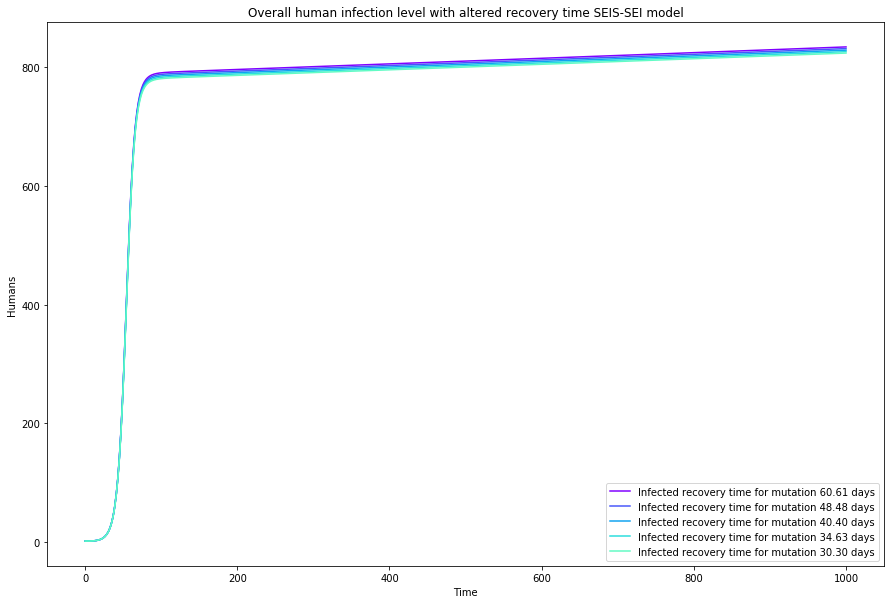

In [293]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_E[:,6,i]+RES_E[:,7,i], c=line_colors[i], label='Infected recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))
    #plt.plot(RES_E[:,0,i]+RES_E[:,1,i], c=line_colors[5+i], label='Susceptible recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()


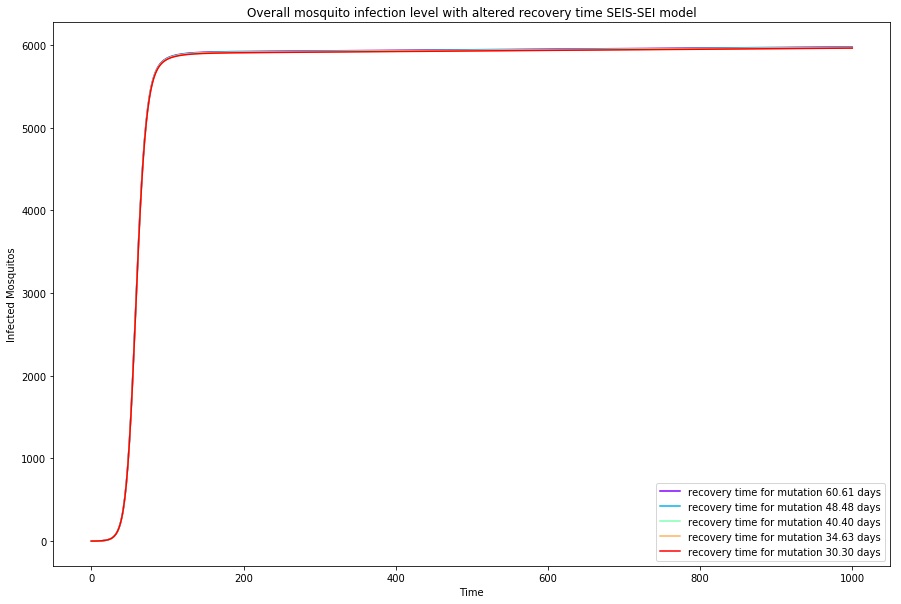

In [363]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_E[:,8,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Mosquitos')
plt.title('Overall mosquito infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

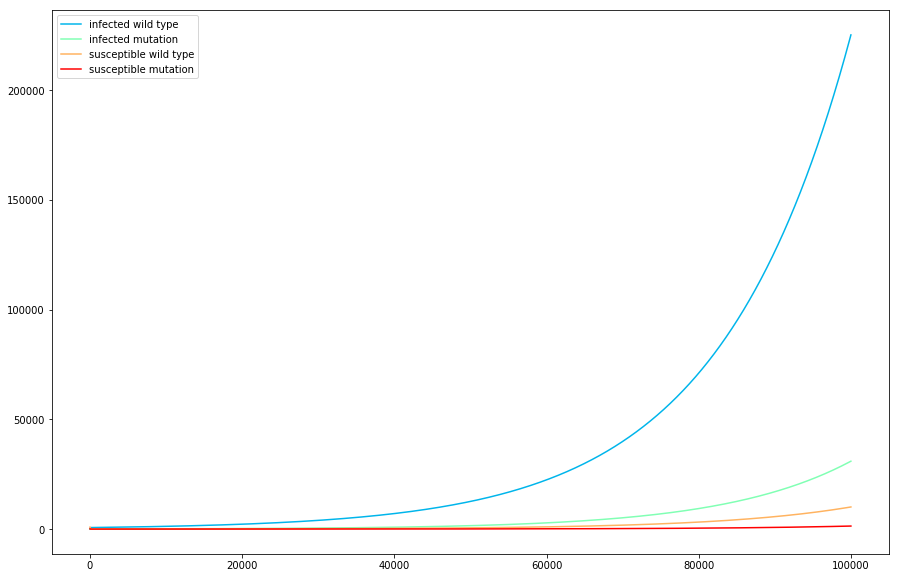

In [283]:
plt.figure(figsize=(15,10))
plt.plot(RES_E[:,6,4], c=line_colors[1],label='infected wild type')
plt.plot(RES_E[:,7,4], c=line_colors[2],label='infected mutation')
plt.plot(RES_E[:,0,4], c=line_colors[3],label='susceptible wild type')
plt.plot(RES_E[:,1,4], c=line_colors[4],label='susceptible mutation')
plt.legend()
plt.show()

In [254]:
(RES_E[-1,6,4]+RES_E[-1,3,4]+RES_E[-1,0,4]-RES_E[0,6,4]+RES_E[0,3,4]+RES_E[0,0,4])/100000

703.41037051641183

In [267]:
NW=np.zeros(100001)
NC=np.zeros(100001)
for i in range(100001):
    NW[i]=RES_E[i,6,4]+RES_E[i,3,4]+RES_E[i,0,4]
    NC[i]=RES_E[i,7,4]+RES_E[i,4,4]+RES_E[i,1,4]

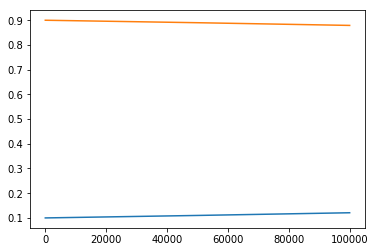

In [308]:
plt.plot(NC/(NC+NW))
plt.plot(NW/(NC+NW))
plt.show()

In [255]:
(RES_E[-1,7,4]+RES_E[-1,4,4]+RES_E[-1,1,4]-RES_E[0,7,4]+RES_E[0,4,4]+RES_E[0,1,4])/100000

96.653966682458034

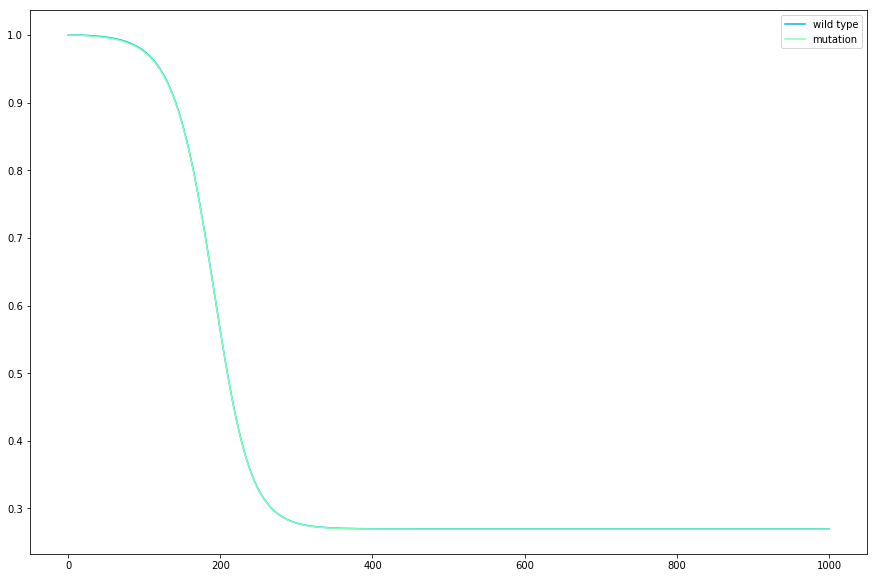

In [202]:
plt.figure(figsize=(15,10))
plt.plot(RES_E[:,0,4]/900, c=line_colors[1],label='wild type')
plt.plot(RES_E[:,1,4]/100, c=line_colors[2],label='mutation')
plt.legend()
plt.show()

In [198]:
RES_E[:,0,4]/900

array([ 1.        ,  1.00001136,  1.00002137, ...,  0.26982237,
        0.26982236,  0.26982236])

## R0
$R_0=\frac{ma^2bc}{r\mu _2 }e^{-\mu _2 \tau _m}e^{-\mu _1 \tau _h}$

In [219]:
((10*0.5*0.5*0.5*0.2)/(r*(40/365)))*np.exp(-(40/365)*7)*np.exp(-0.2*7)

522.43611593958349

## Changing initial level of mutation

In [360]:
m=np.linspace(100,500,5)
RES_m=np.zeros((100001,9,5))

r=0.5/1e3;

beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.025,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
gamma=np.array([0.033, 0,0.033]);
mu=np.array([3e-6,2.7e-7])


INPUT=np.hstack((X0,Y0))
for i in range(5):
    mutants=m[i]
    N=1e3-mutants
    X0=np.array([1e3-mutants,mutants, 1e3]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=100000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
  
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_death,INPUT,t_range)
    RES_m[:,:,i]=RES_mut

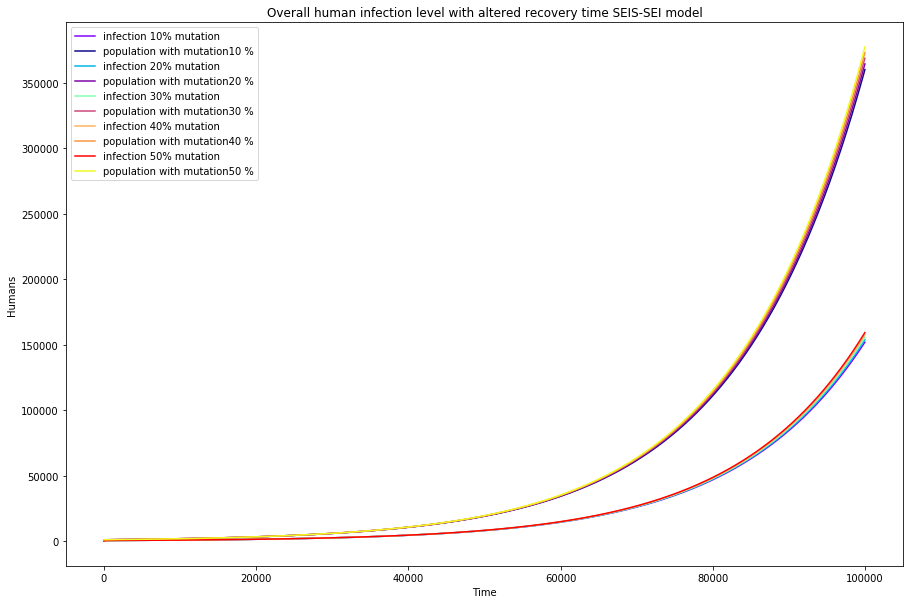

In [362]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_m[:,6,i]+RES_m[:,7,i], c=line_colors[i], label='infection {0:.0f}% mutation'.format(m[i]/10))
    #plt.plot(RES_m[:,1,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    plt.plot(RES_m[:,0,i]+RES_m[:,1,i]+RES_m[:,3,i]+RES_m[:,4,i]+RES_m[:,6,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    
plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()


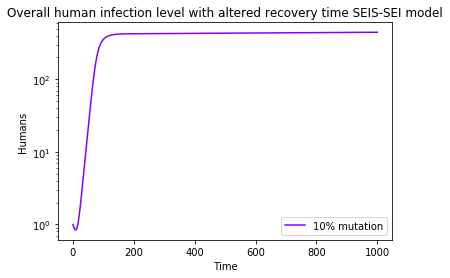

In [325]:
plt.semilogy(RES_m[:,6,0]+RES_m[:,7,0], c=line_colors[0], label='{0:.0f}% mutation'.format(m[0]/10))
    #plt.plot(RES_E[:,0,i]+RES_E[:,1,i], c=line_colors[5+i], label='Susceptible recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()
